In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, roc_curve, auc,roc_auc_score
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns=['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()
def preprocess_message(message):
    message = message.lower()
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.split()
    message = [ps.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message = ' '.join(message)
    return message
df['message'] = df['message'].apply(preprocess_message)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5572)
x= vectorizer.fit_transform(df['message']).toarray()
y= df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though
...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...
5568,ham,b go esplanad fr home
5569,ham,piti mood suggest
5570,ham,guy bitch act like interest buy someth els nex...


In [ ]:
y.shape

(5572,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.value_counts()

,count
label,
0,3860
1,597


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred=nb_model.predict(x_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.967713004484305


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naïve Bayes Results:
Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



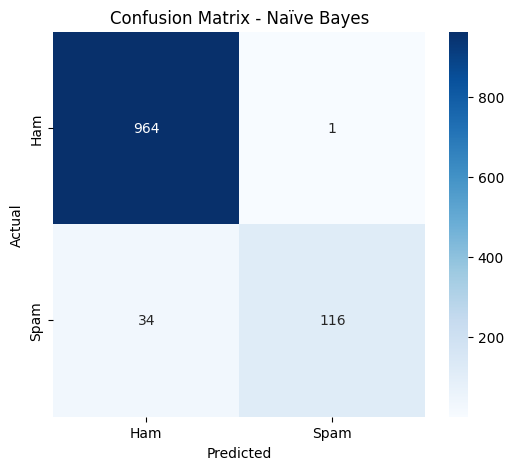

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

# Preprocessing
nltk.download('stopwords')
ps = PorterStemmer()
def preprocess_message(message):
    message = message.lower()
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.split()
    message = [ps.stem(word) for word in set(message) if word not in stopwords.words('english')]
    return ' '.join(message)

df['message'] = df['message'].apply(preprocess_message)

# Feature extraction
vectorizer = TfidfVectorizer(max_features=5572)
x = vectorizer.fit_transform(df['message']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

print("Naïve Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naïve Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


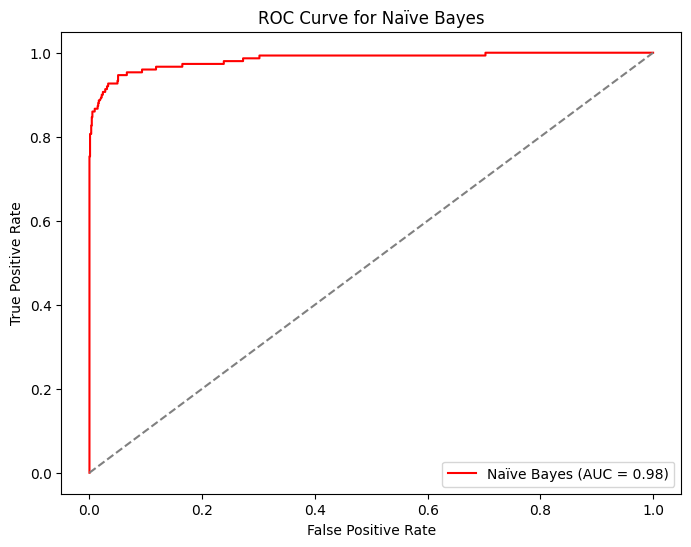

In [ ]:
# Get probability predictions for ROC curve (Naïve Bayes)
nb_probs = nb_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score for Naïve Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

# Plot ROC Curve for Naïve Bayes
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='red', label='Naïve Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naïve Bayes")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [ ]:
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Results:
Accuracy: 0.957847533632287
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.96      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Logistic Regression Results:
Accuracy: 0.957847533632287
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.96      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



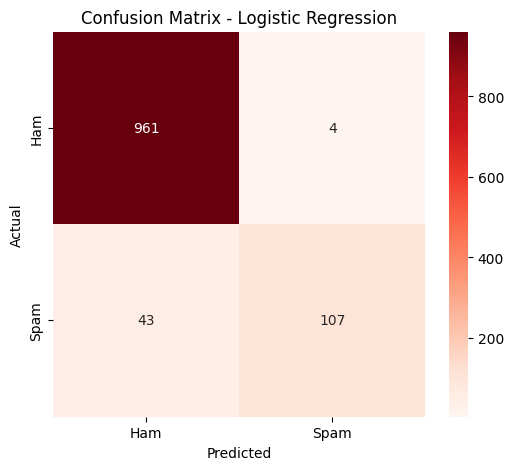

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

# Preprocessing
nltk.download('stopwords')
ps = PorterStemmer()
def preprocess_message(message):
    message = message.lower()
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.split()
    message = [ps.stem(word) for word in set(message) if word not in stopwords.words('english')]
    return ' '.join(message)

df['message'] = df['message'].apply(preprocess_message)

# Feature extraction
vectorizer = TfidfVectorizer(max_features=5572)
x = vectorizer.fit_transform(df['message']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


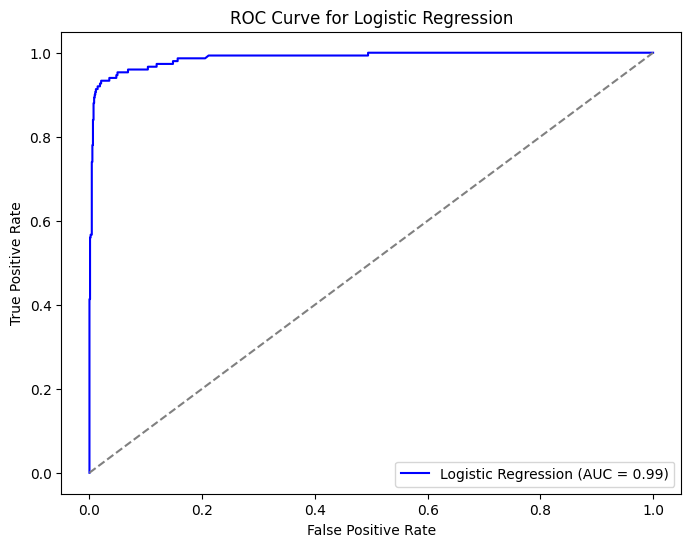

In [ ]:
probs = lr_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

KNN Model Results:
Accuracy: 0.9175
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.39      0.56       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.76      1115
weighted avg       0.92      0.92      0.90      1115



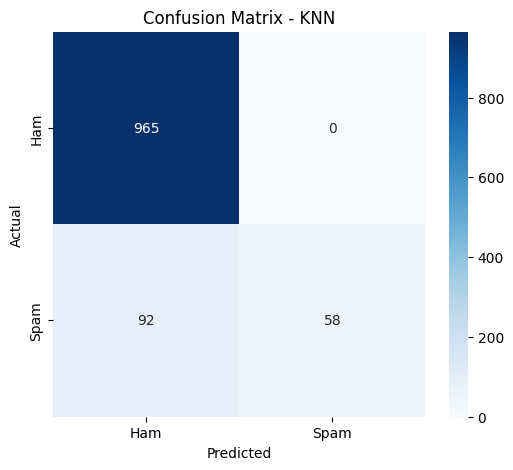

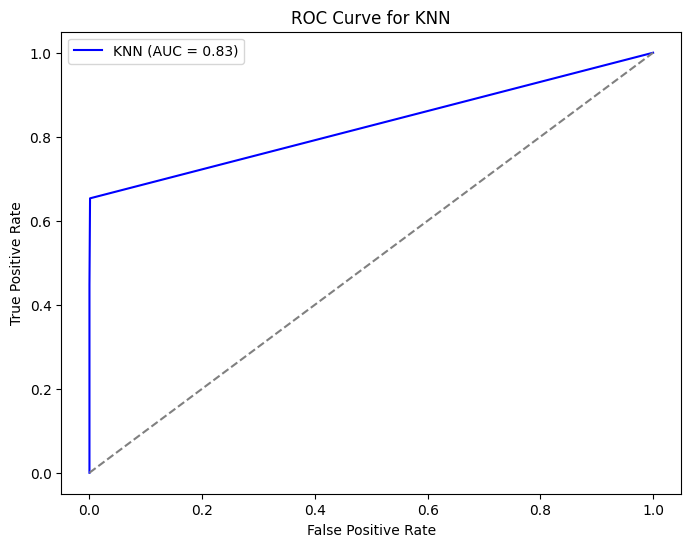

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(x_test)

# Evaluation
print("KNN Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# ROC Curve
knn_probs = knn_model.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='blue', label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend()
plt.show()


SVM Model Results:
Accuracy: 0.9794
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



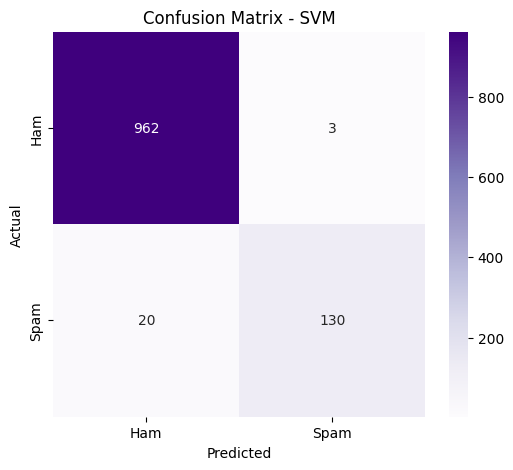

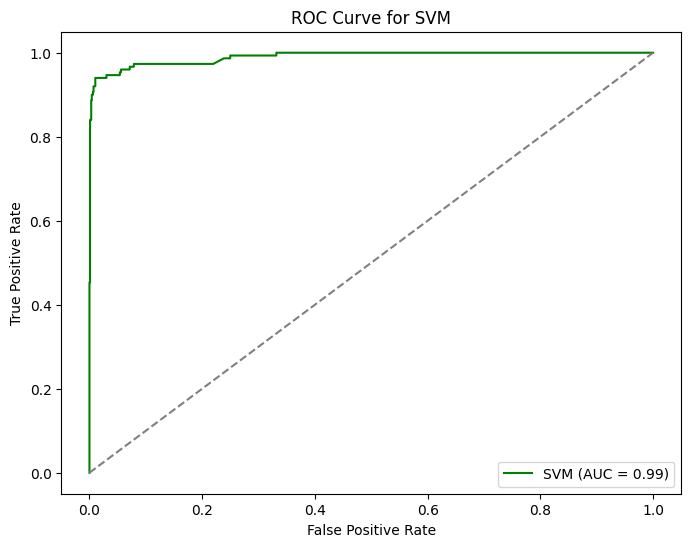

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(x_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(x_test)

# Evaluation
print("SVM Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# ROC Curve
svm_probs = svm_model.decision_function(x_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='green', label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test,y_test)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8418 - loss: 0.4329 - val_accuracy: 0.9031 - val_loss: 0.1637
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9505 - loss: 0.1200 - val_accuracy: 0.9803 - val_loss: 0.0791
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9929 - loss: 0.0287 - val_accuracy: 0.9794 - val_loss: 0.0764
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9971 - loss: 0.0142 - val_accuracy: 0.9812 - val_loss: 0.0775
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9996 - loss: 0.0041 - val_accuracy: 0.9812 - val_loss: 0.0813
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9843 - loss: 0.0715


In [ ]:
print(f"Test Loss: {loss}")

Test Loss: 0.08128508925437927


In [ ]:
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9811659455299377


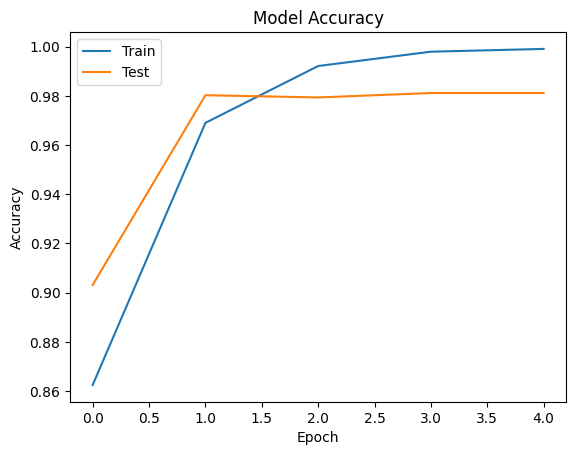

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

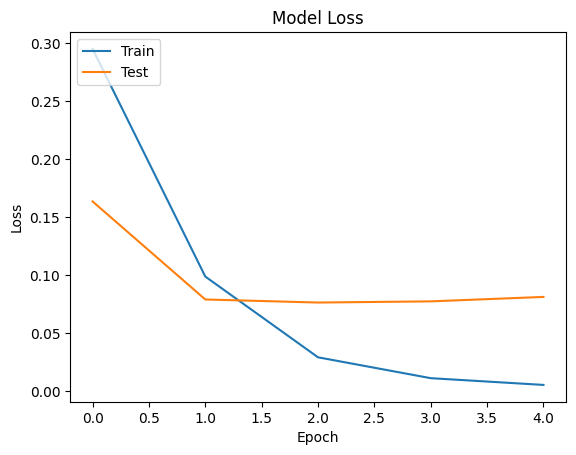

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<Axes: xlabel='label', ylabel='count'>

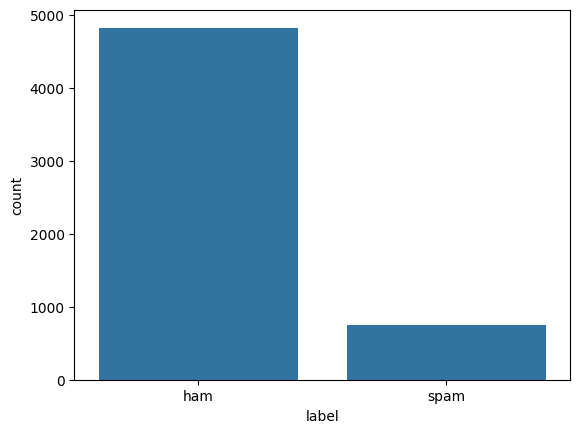

In [ ]:
sns.countplot(data=df,x=df['label'])

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
loaded_model = joblib.load('model.pkl')